<a href="https://colab.research.google.com/github/TaliOrsi/Portif-lio-Dados/blob/main/C%C3%B3pia_de_An%C3%A1lise_Mercado_Financeiro_Ambev_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import pandas_datareader as wb
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime, random
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection,metrics, linear_model
from sklearn.svm import LinearSVC


In [ ]:
data = pd.read_csv("/content/ABEVfinanças.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-22,2.91,2.99,2.87,2.90,2.811694,52349400
1,2020-07-23,2.89,2.90,2.78,2.79,2.705044,21725400
2,2020-07-24,2.80,2.88,2.75,2.87,2.782608,31077900
3,2020-07-27,2.89,3.00,2.87,2.99,2.898954,48253500
4,2020-07-28,2.94,2.99,2.92,2.93,2.840781,35456300


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-07-15,3.48,3.49,3.37,3.40,3.40,19507300
248,2021-07-16,3.44,3.45,3.37,3.39,3.39,37988700
249,2021-07-19,3.28,3.31,3.17,3.21,3.21,35854300
250,2021-07-20,3.17,3.24,3.16,3.20,3.20,27402200
251,2021-07-21,3.23,3.28,3.19,3.26,3.26,25459600


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,2.852778,2.901310,2.808849,2.855159,2.821805,2.429188e+07
std,0.412257,0.414271,0.407070,0.412604,0.435147,1.129334e+07
min,2.180000,2.210000,2.130000,2.140000,2.074836,3.904200e+06
25%,2.490000,2.540000,2.450000,2.507500,2.433570,1.700218e+07
50%,2.800000,2.865000,2.770000,2.810000,2.790000,2.169775e+07
75%,3.080000,3.120000,3.030000,3.072500,3.054324,2.908120e+07
max,3.910000,3.950000,3.870000,3.900000,3.900000,7.955070e+07


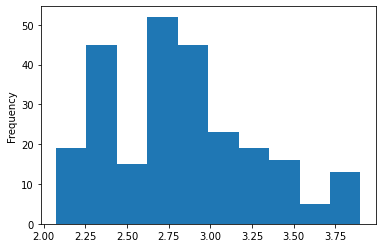

In [ ]:
data['Adj Close'].plot.hist()

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=252, step=1)

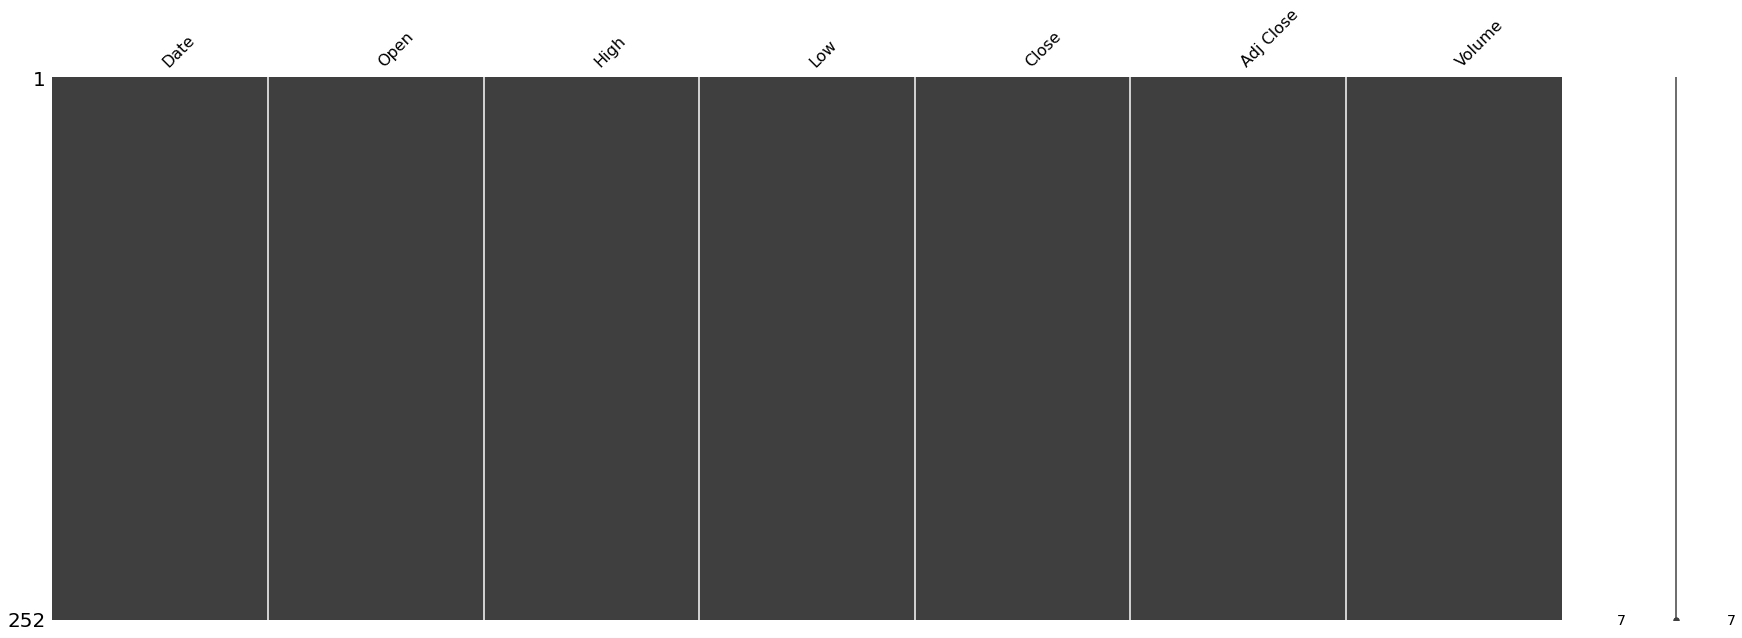

In [ ]:
missingno.matrix(data,figsize=(30,10))

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
data['Adj Close'].value_counts()

2.259051    6
2.414179    4
2.900000    4
2.346310    4
2.760000    4
           ..
3.830000    1
2.640000    1
2.840781    1
2.627480    1
3.470000    1
Name: Adj Close, Length: 150, dtype: int64

In [ ]:
data['Adj Close'].mean()

2.8218051388888896

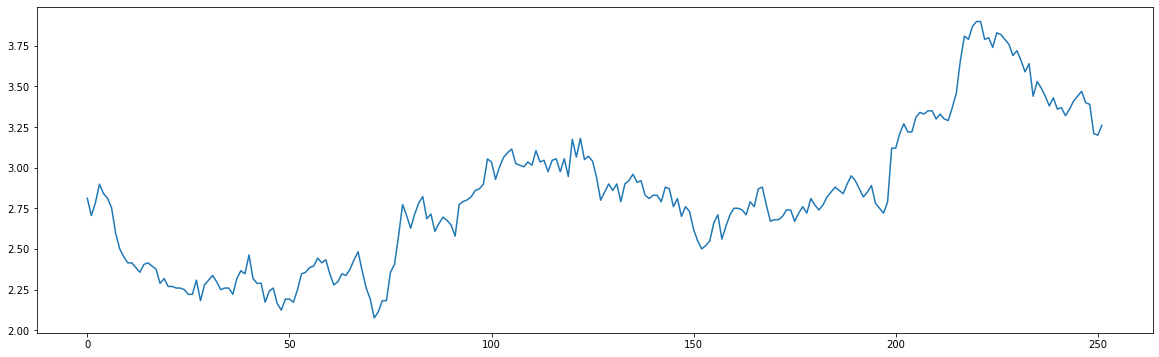

In [ ]:
data['Adj Close'].plot(figsize=(20,6))

In [ ]:
# Média Móvel


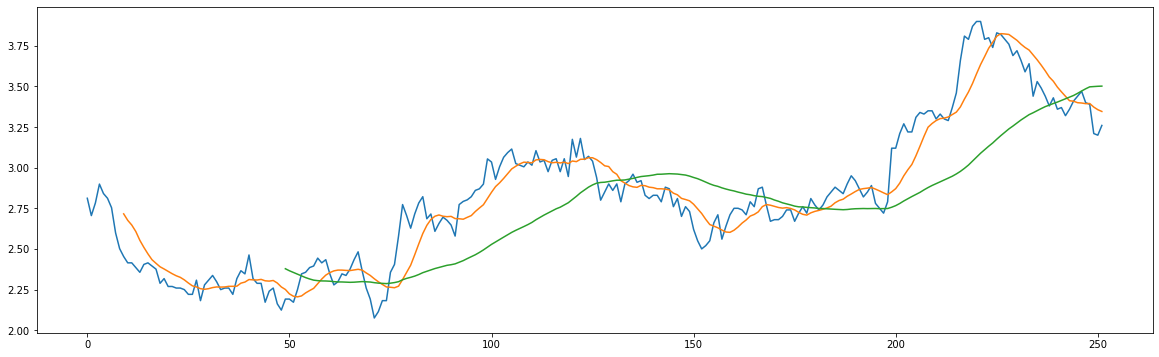

In [ ]:
data['Adj Close'].plot(figsize=(20,6), label= '/content/ABEVfinanças.csv')
data['Adj Close'].rolling(10).mean().plot(label = '10 dias')
data['Adj Close'].rolling(50).mean().plot(label = '50 dias')

#Percentual de Retorno

In [ ]:
data['Return'] = data['Adj Close'].pct_change()

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2020-07-22,2.91,2.99,2.87,2.90,2.811694,52349400,NaN
1,2020-07-23,2.89,2.90,2.78,2.79,2.705044,21725400,-0.037931
2,2020-07-24,2.80,2.88,2.75,2.87,2.782608,31077900,0.028674
3,2020-07-27,2.89,3.00,2.87,2.99,2.898954,48253500,0.041812
4,2020-07-28,2.94,2.99,2.92,2.93,2.840781,35456300,-0.020067


In [ ]:
media_percentual_retorno = data['Return'].mean()*100

In [ ]:
print(f"Percentual Retorno Médio:{media_percentual_retorno}")

Percentual Retorno Médio:0.0948279956298262


##Desvio Padrão

In [ ]:
desvio_padrao_retorno = data.Return.std()

In [ ]:
print('Percentual Retorno Medio = {:.4f}'.format(desvio_padrao_retorno))

Percentual Retorno Medio = 0.0269


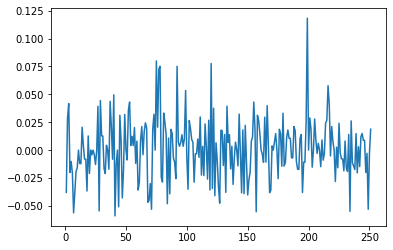

In [ ]:
data['Return'].plot()

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       1
dtype: int64

In [ ]:
data['Return'].fillna((data['Return'].mean()), inplace = True)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2020-07-22,2.91,2.99,2.87,2.90,2.811694,52349400,0.000948
1,2020-07-23,2.89,2.90,2.78,2.79,2.705044,21725400,-0.037931
2,2020-07-24,2.80,2.88,2.75,2.87,2.782608,31077900,0.028674
3,2020-07-27,2.89,3.00,2.87,2.99,2.898954,48253500,0.041812
4,2020-07-28,2.94,2.99,2.92,2.93,2.840781,35456300,-0.020067


In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Return       float64
dtype: object

In [ ]:
media_adj_close = data['Adj Close'].mean()

In [ ]:
print (f'Média do Preço de Fechamento Ajustado:{media_adj_close}')

Média do Preço de Fechamento Ajustado:2.8218051388888896


In [ ]:
data.loc[data["Adj Close"] <= media_adj_close, "Buy"] = 1
data.loc[data["Adj Close"] > media_adj_close, "Buy"] = 9

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Buy
0,2020-07-22,2.91,2.99,2.87,2.90,2.811694,52349400,0.000948,1.0
1,2020-07-23,2.89,2.90,2.78,2.79,2.705044,21725400,-0.037931,1.0
2,2020-07-24,2.80,2.88,2.75,2.87,2.782608,31077900,0.028674,1.0
3,2020-07-27,2.89,3.00,2.87,2.99,2.898954,48253500,0.041812,9.0
4,2020-07-28,2.94,2.99,2.92,2.93,2.840781,35456300,-0.020067,9.0


In [ ]:
data['Buy'].value_counts()

1.0    140
9.0    112
Name: Buy, dtype: int64

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return',
       'Buy'],
      dtype='object')

In [ ]:
x_train = pd.DataFrame()
y_train = pd.DataFrame()

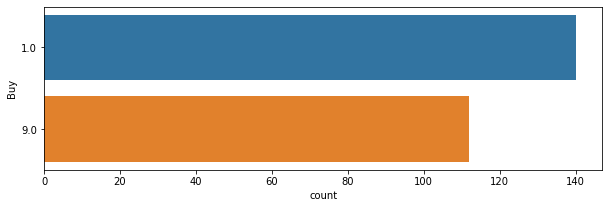

In [ ]:
plt.figure(figsize= (10,3))
sns.countplot(y="Buy", data=data)

In [ ]:
x_train.index

Index([], dtype='object')

In [ ]:
x_train['High'] = data['High']

In [ ]:
x_train.head()

,High
0,2.99
1,2.90
2,2.88
3,3.00
4,2.99


In [ ]:
x_train['Low'] = data['Low']
x_train['Open'] = data['Open']
x_train['Close'] = data['Close']
x_train['Adj Close'] = data['Adj Close']
x_train['Volume'] = data['Volume']
x_train['Return'] = data['Return']

In [ ]:
x_train.head()

,High,Low,Open,Close,Adj Close,Return
0,2.99,2.87,2.91,2.90,2.811694,0.000948
1,2.90,2.78,2.89,2.79,2.705044,-0.037931
2,2.88,2.75,2.80,2.87,2.782608,0.028674
3,3.00,2.87,2.89,2.99,2.898954,0.041812
4,2.99,2.92,2.94,2.93,2.840781,-0.020067


In [ ]:
y_train['Buy'] = data['Buy']

In [ ]:
y_train.head()

,Buy
0,1.0
1,1.0
2,1.0
3,9.0
4,9.0


In [ ]:
x_train.shape

(252, 6)

In [ ]:
y_train.shape

(252, 1)

In [ ]:
def fit_ml(algoritmo, x_train, y_train, cv):
  model = algoritmo.fit (x_train, y_train)
  acc = round (model.score(x_train, y_train)*100,2)

  train_pred = model_selection.cross_val_predict(algoritmo, x_train, y_train, cv=cv, n_jobs = -1)
  acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100,2)
  return train_pred, acc, acc_cv

In [ ]:
start_time = time.time()

In [ ]:
train_pred_log, acc_log, acc_cv_log = fit_ml(LogisticRegression(), x_train, y_train, 10)
log_time = (time.time() - start_time)
print ("Acurácia: %s" %acc_log)
print ("Acurácia Cruzada: %s" %acc_cv_log)
print ("Tempo: %s" %datetime.timedelta(seconds= log_time))

Acurácia: 92.86
Acurácia Cruzada: 91.67
Tempo: 0:18:08.960162


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml(LinearSVC(), x_train, y_train, 10)
log_time = (time.time() - start_time)
print ("Acurácia: %s" %acc_log)
print ("Acurácia Cruzada: %s" %acc_cv_log)
print ("Tempo: %s" %datetime.timedelta(seconds= log_time))

Acurácia: 97.62
Acurácia Cruzada: 92.86
Tempo: 0:00:00.125886


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
data.head(len(data))

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Buy
0,2020-07-22,2.91,2.99,2.87,2.90,2.811694,52349400,0.000948,1.0
1,2020-07-23,2.89,2.90,2.78,2.79,2.705044,21725400,-0.037931,1.0
2,2020-07-24,2.80,2.88,2.75,2.87,2.782608,31077900,0.028674,1.0
3,2020-07-27,2.89,3.00,2.87,2.99,2.898954,48253500,0.041812,9.0
4,2020-07-28,2.94,2.99,2.92,2.93,2.840781,35456300,-0.020067,9.0
...,...,...,...,...,...,...,...,...,...
247,2021-07-15,3.48,3.49,3.37,3.40,3.400000,19507300,-0.020173,9.0
248,2021-07-16,3.44,3.45,3.37,3.39,3.390000,37988700,-0.002941,9.0
249,2021-07-19,3.28,3.31,3.17,3.21,3.210000,35854300,-0.053097,9.0
250,2021-07-20,3.17,3.24,3.16,3.20,3.200000,27402200,-0.003115,9.0
